In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/digital_marketing_campaign_dataset - digital_marketing_campaign_dataset.csv.csv"
df = pd.read_csv(file_path)

df.head()
df.info()
print(df.columns.tolist())
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

(8000, 20)

In [39]:
df.describe(include='all')
df.isnull().sum()
df.duplicated().sum()

# KPI: ROAS (using assumed revenue per conversion = 1 unit)
df['Revenue'] = df['Conversion'] * 1
df['ROAS'] = df['Revenue'] / df['AdSpend']
df['ROAS'].replace([np.inf, -np.inf], np.nan, inplace=True)

df[['ROAS']].describe()


/tmp/ipython-input-479856304.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ROAS'].replace([np.inf, -np.inf], np.nan, inplace=True)


,ROAS
count,8000.000000
mean,0.000383
std,0.000760
min,0.000000
25%,0.000117
50%,0.000169
75%,0.000329
max,0.009670


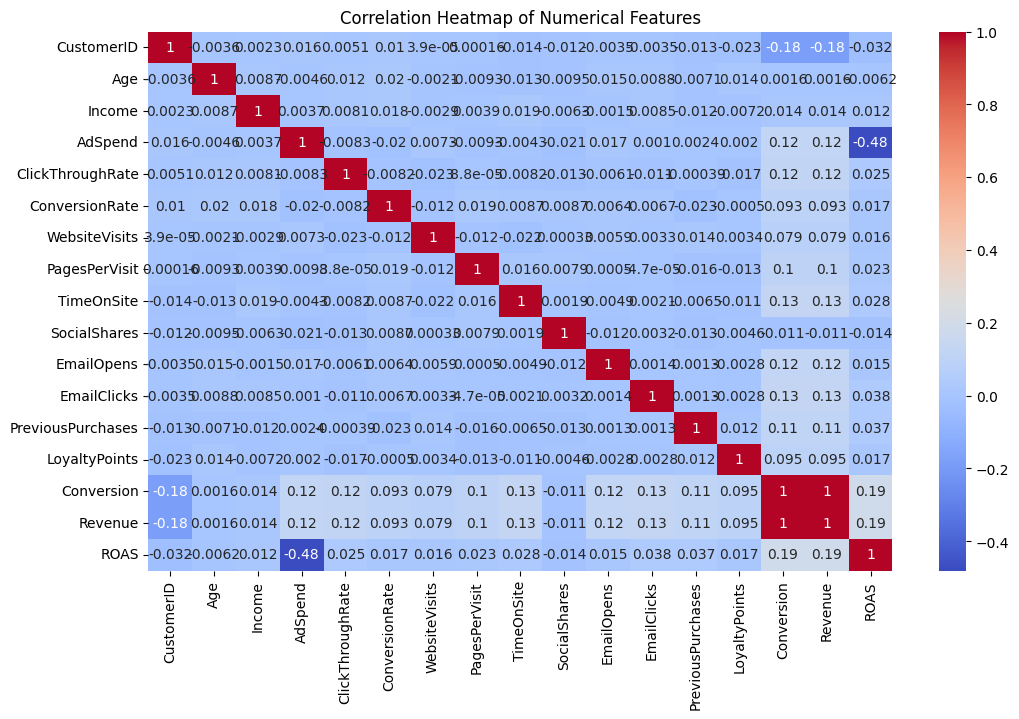

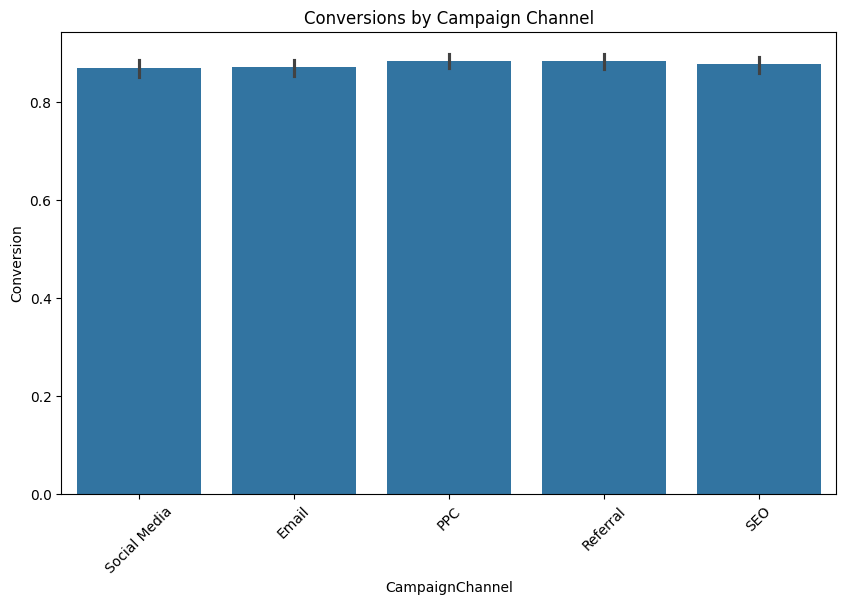

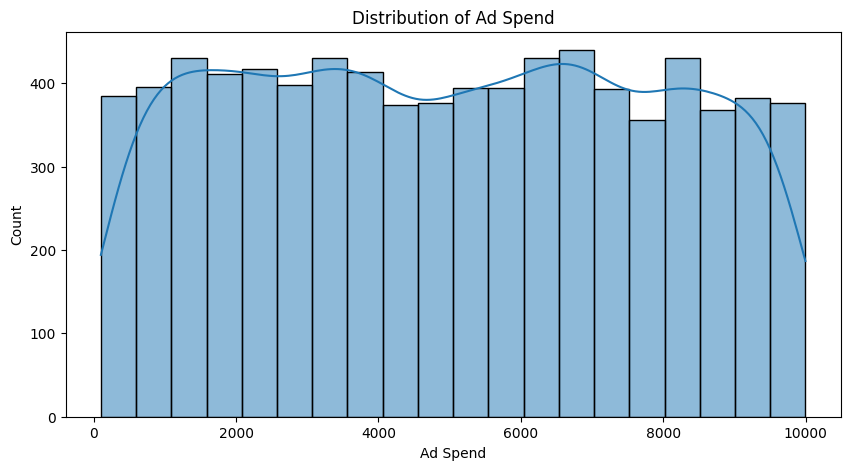

/tmp/ipython-input-1229177638.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_bucket = df.groupby('SpendBucket')['Conversion'].mean().reset_index()
/tmp/ipython-input-1229177638.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SpendBucket', y='Conversion', data=conversion_by_bucket, palette="viridis")


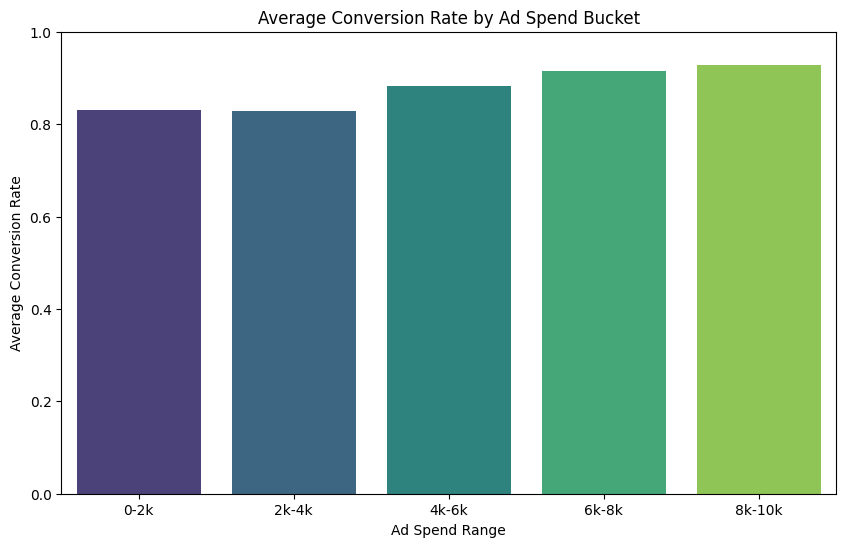

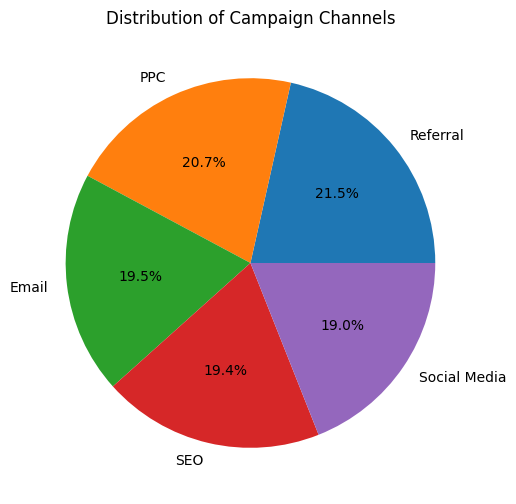

/tmp/ipython-input-1229177638.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_bucket = df.groupby('SpendBucket')['Conversion'].mean().reset_index()


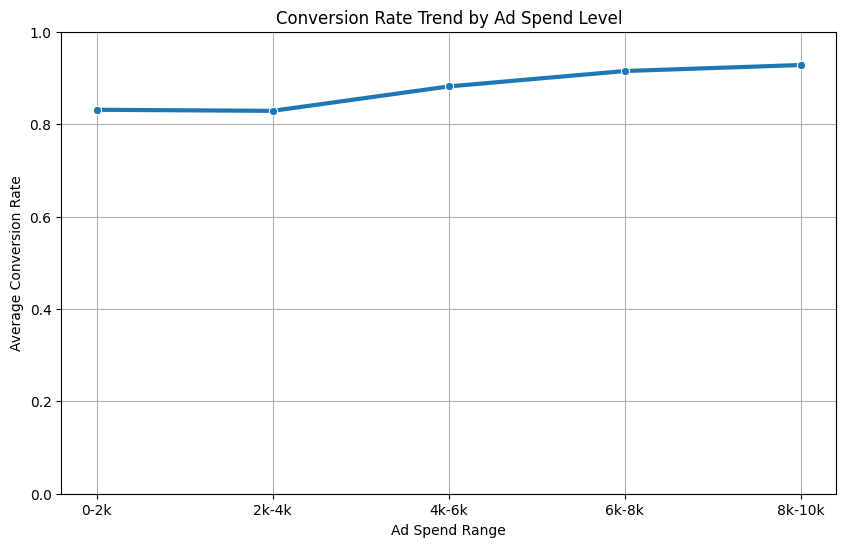

In [22]:
# 1️⃣ Correlation Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 2️⃣ Channel vs Conversion Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x='CampaignChannel', y='Conversion', data=df)
plt.xticks(rotation=45)
plt.title("Conversions by Campaign Channel")
plt.show()

# 3️⃣ Distribution of Ad Spend
plt.figure(figsize=(10,5))
sns.histplot(df['AdSpend'], bins=20, kde=True)
plt.title("Distribution of Ad Spend")
plt.xlabel("Ad Spend")
plt.show()

# Create Ad Spend buckets for meaningful visual
df['SpendBucket'] = pd.cut(df['AdSpend'],
                           bins=[0, 2000, 4000, 6000, 8000, 10000],
                           labels=['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k'])

# Calculate mean conversion for each bucket
conversion_by_bucket = df.groupby('SpendBucket')['Conversion'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='SpendBucket', y='Conversion', data=conversion_by_bucket, palette="viridis")
plt.title("Average Conversion Rate by Ad Spend Bucket")
plt.xlabel("Ad Spend Range")
plt.ylabel("Average Conversion Rate")
plt.ylim(0, 1)
plt.show()


# Channel Count Pie Chart
plt.figure(figsize=(6,6))
df['CampaignChannel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Campaign Channels")
plt.ylabel("")
plt.show()

# Create ad spend buckets (same as previous chart for consistency)
df['SpendBucket'] = pd.cut(df['AdSpend'],
                           bins=[0, 2000, 4000, 6000, 8000, 10000],
                           labels=['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k'])

# Group by bucket to calculate mean conversion rate
conversion_by_bucket = df.groupby('SpendBucket')['Conversion'].mean().reset_index()

# Line Chart
plt.figure(figsize=(10,6))
sns.lineplot(x='SpendBucket', y='Conversion', data=conversion_by_bucket, marker='o', linewidth=3)
plt.title("Conversion Rate Trend by Ad Spend Level")
plt.xlabel("Ad Spend Range")
plt.ylabel("Average Conversion Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()




🔹 Last-touch Attribution Table:


,CampaignChannel,Conversion
2,Referral,1518
1,PPC,1461
3,SEO,1359
0,Email,1355
4,Social Media,1319


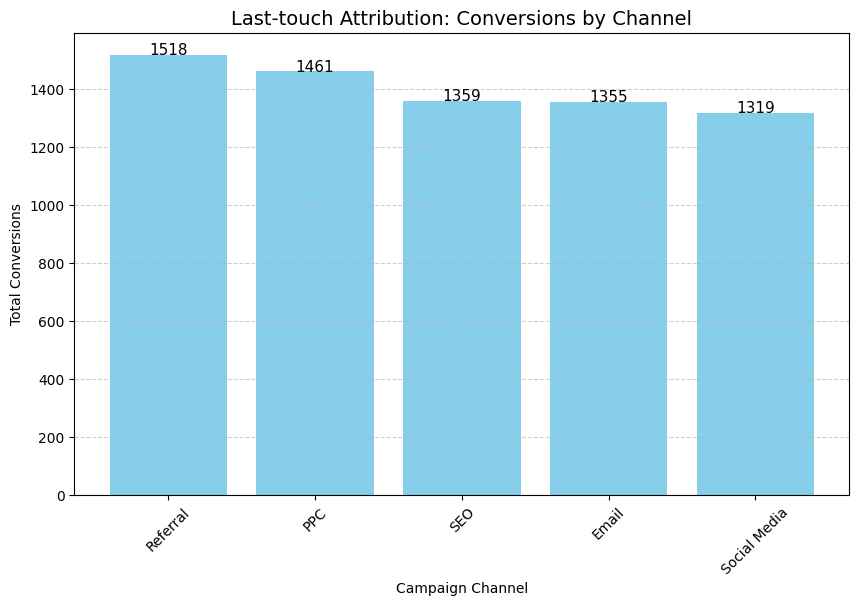

In [24]:
# Last-touch: Total conversions credited to last channel seen
baseline_last_touch = df.groupby('CampaignChannel')['Conversion'].sum().reset_index()
baseline_last_touch = baseline_last_touch.sort_values('Conversion', ascending=False)

print("\n🔹 Last-touch Attribution Table:")
display(baseline_last_touch)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(baseline_last_touch['CampaignChannel'],
               baseline_last_touch['Conversion'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f"{int(yval)}",
             ha='center', fontsize=11)

plt.title("Last-touch Attribution: Conversions by Channel", fontsize=14)
plt.xlabel("Campaign Channel")
plt.ylabel("Total Conversions")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()



🔹 Multi-touch Attribution Table:


,CampaignChannel,Conversion
2,Referral,0.883072
1,PPC,0.882779
3,SEO,0.876774
0,Email,0.870263
4,Social Media,0.868334


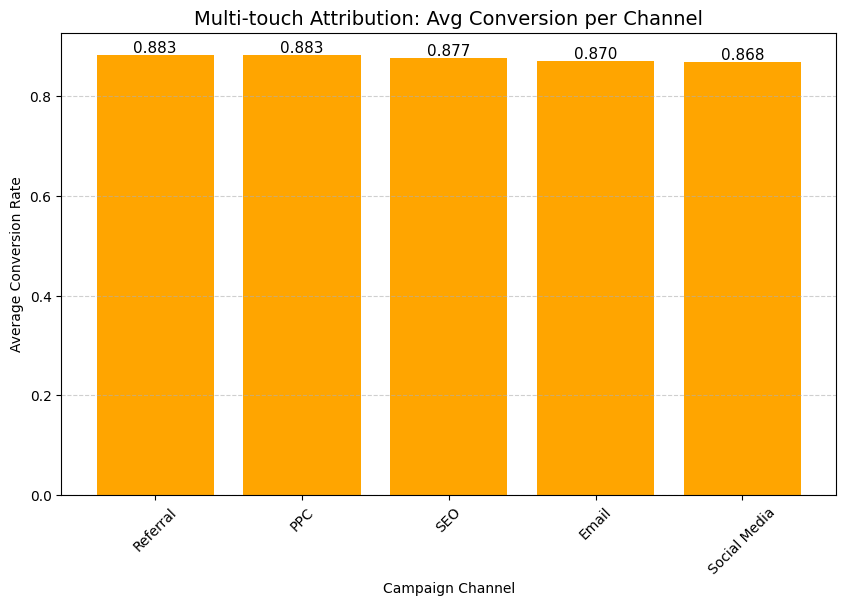

In [26]:
# Multi-touch Attribution: avg conversion probability
baseline_multi_touch = df.groupby('CampaignChannel')['Conversion'].mean().reset_index()
baseline_multi_touch = baseline_multi_touch.sort_values('Conversion', ascending=False)

print("\n🔹 Multi-touch Attribution Table:")
display(baseline_multi_touch)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(baseline_multi_touch['CampaignChannel'],
               baseline_multi_touch['Conversion'],
               color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.005,
             f"{yval:.3f}",
             ha='center', fontsize=11)

plt.title("Multi-touch Attribution: Avg Conversion per Channel", fontsize=14)
plt.xlabel("Campaign Channel")
plt.ylabel("Average Conversion Rate")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


In [5]:
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/digital_marketing_campaign_dataset - digital_marketing_campaign_dataset.csv.csv"
df = pd.read_csv(file_path)

df.head()



,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [10]:
df['Treatment'] = np.where(df['EmailClicks'] > 0, 1, 0)


In [11]:
features = ['Age', 'Income', 'WebsiteVisits', 'PagesPerVisit',
            'TimeOnSite', 'SocialShares', 'EmailOpens',
            'PreviousPurchases', 'LoyaltyPoints', 'AdSpend']


In [13]:
!pip install econml dowhy

import numpy as np
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Treatment Variable (valid variation)
df['Treatment'] = np.where(df['EmailClicks'] > 0, 1, 0)

# Feature Selection (stable variables)
features = ['Age', 'Income', 'WebsiteVisits', 'PagesPerVisit',
            'TimeOnSite', 'SocialShares', 'EmailOpens',
            'PreviousPurchases', 'LoyaltyPoints', 'AdSpend']

target = 'Conversion'
treatment = 'Treatment'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target],
                                                    test_size=0.2, random_state=42)

# Causal Forest Model
model = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=200),
    model_y=RandomForestRegressor(n_estimators=200),
    n_estimators=300,
    random_state=42
)

model.fit(
    Y=df[target].values,
    T=df[treatment].values,
    X=df[features].values
)

df['ITE'] = model.effect(df[features].values)

print(df[['ITE']].head())
print("Average Treatment Effect (ATE):", df['ITE'].mean())


        ITE
0  0.151092
1  0.131665
2  0.160529
3  0.130878
4  0.294287
Average Treatment Effect (ATE): 0.09822845329303011


In [34]:
ATE = np.mean(df['ITE'])
print("Average Treatment Effect (ATE):", ATE)




Average Treatment Effect (ATE): 0.09822845329303011



🔹 Treatment vs Control Summary Table:


,Treatment,Avg_Conversion,Users
0,0,0.795970,794
1,1,0.885373,7206


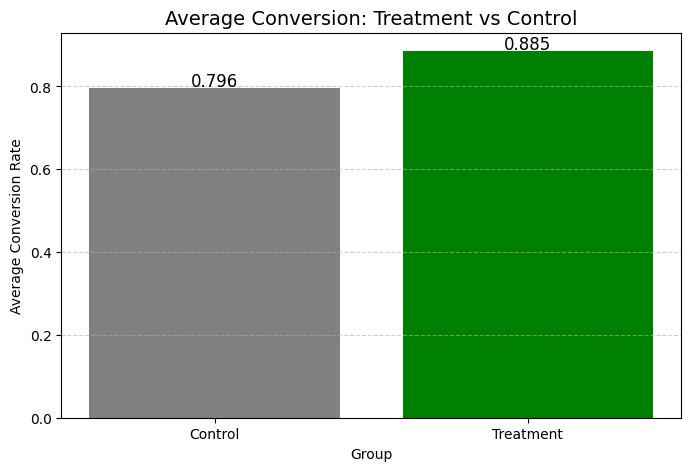

In [22]:
# Summary Table
group_effect = df.groupby('Treatment')['Conversion'].agg(
    Avg_Conversion='mean',
    Users='count'
).reset_index()

print("\n🔹 Treatment vs Control Summary Table:")
display(group_effect)

# Bar Plot
plt.figure(figsize=(8,5))
bars = plt.bar(group_effect['Treatment'].map({0:"Control", 1:"Treatment"}),
               group_effect['Avg_Conversion'],
               color=['gray','green'])

# Adding labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.005,
             f"{yval:.3f}",
             ha='center',
             fontsize=12)

plt.title("Average Conversion: Treatment vs Control", fontsize=14)
plt.xlabel("Group")
plt.ylabel("Average Conversion Rate")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


🔹 Incremental ROAS Summary Table:


/tmp/ipython-input-2463137035.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uplift_roas_table = df.groupby('UpliftGroup')[['Incremental_Revenue', 'Incremental_ROAS']].mean().reset_index()


,UpliftGroup,Avg_Incremental_Revenue,Avg_Incremental_ROAS
0,Low,3.003534,0.000931
1,Medium,7.049780,0.003241
2,High,10.835025,0.005313
3,Very High,18.403042,0.011036


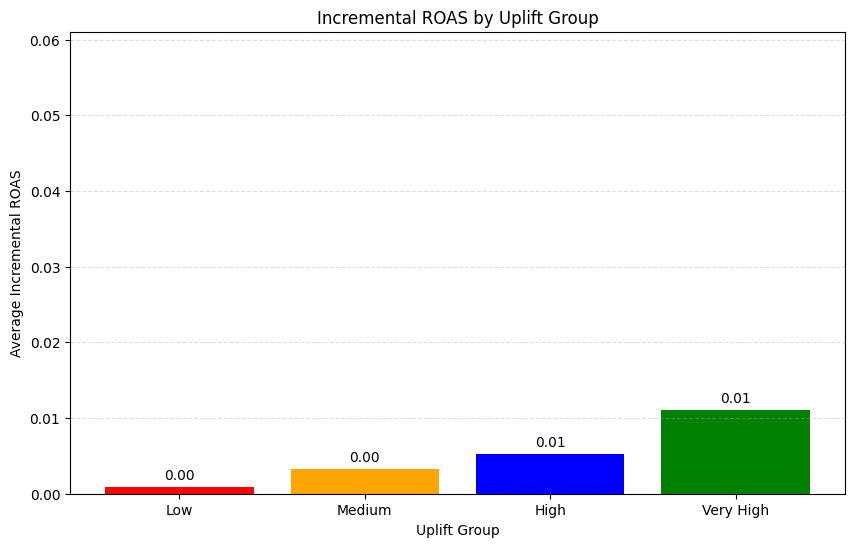

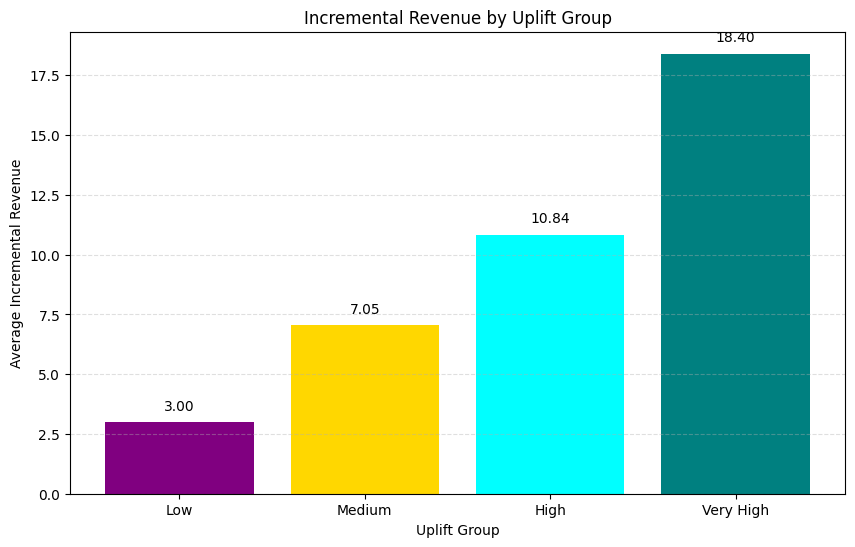

In [38]:
# ----------------------------------------------
# 4.7.1 Incremental ROAS Calculation
# ----------------------------------------------

# Estimated revenue per conversion (you can adjust based on real data)
revenue_per_conversion = 100

# Calculate Incremental Revenue from ITE
df['Incremental_Revenue'] = df['ITE'] * revenue_per_conversion

# Calculate Incremental ROAS
df['Incremental_ROAS'] = df['Incremental_Revenue'] / (df['AdSpend'] + 1e-6)  # Avoid zero division

# Summary table grouped by uplift category
uplift_roas_table = df.groupby('UpliftGroup')[['Incremental_Revenue', 'Incremental_ROAS']].mean().reset_index()
uplift_roas_table.rename(columns={
    'Incremental_Revenue': 'Avg_Incremental_Revenue',
    'Incremental_ROAS': 'Avg_Incremental_ROAS'
}, inplace=True)

print("🔹 Incremental ROAS Summary Table:")
display(uplift_roas_table)


plt.figure(figsize=(10,6))
bars = plt.bar(
    uplift_roas_table['UpliftGroup'],
    uplift_roas_table['Avg_Incremental_ROAS'],
    color=['red', 'orange', 'blue', 'green']
)

# Annotate bars
for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             y_val + 0.001,
             f"{y_val:.2f}", ha="center", fontsize=10)

plt.title("Incremental ROAS by Uplift Group")
plt.xlabel("Uplift Group")
plt.ylabel("Average Incremental ROAS")
plt.ylim(0, uplift_roas_table['Avg_Incremental_ROAS'].max() + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


plt.figure(figsize=(10,6))
bars = plt.bar(
    uplift_roas_table['UpliftGroup'],
    uplift_roas_table['Avg_Incremental_Revenue'],
    color=['purple', 'gold', 'cyan', 'teal']
)

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             y_val + 0.5,
             f"{y_val:.2f}", ha="center", fontsize=10)

plt.title("Incremental Revenue by Uplift Group")
plt.xlabel("Uplift Group")
plt.ylabel("Average Incremental Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()



🔹 Uplift Effect Summary Table:


/tmp/ipython-input-3240796579.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uplift_summary = df.groupby('UpliftGroup')['Conversion'].agg(


,UpliftGroup,Avg_Conversion,Users
0,Low,0.9225,2000
1,Medium,0.9180,2000
2,High,0.8890,2000
3,Very High,0.7765,2000


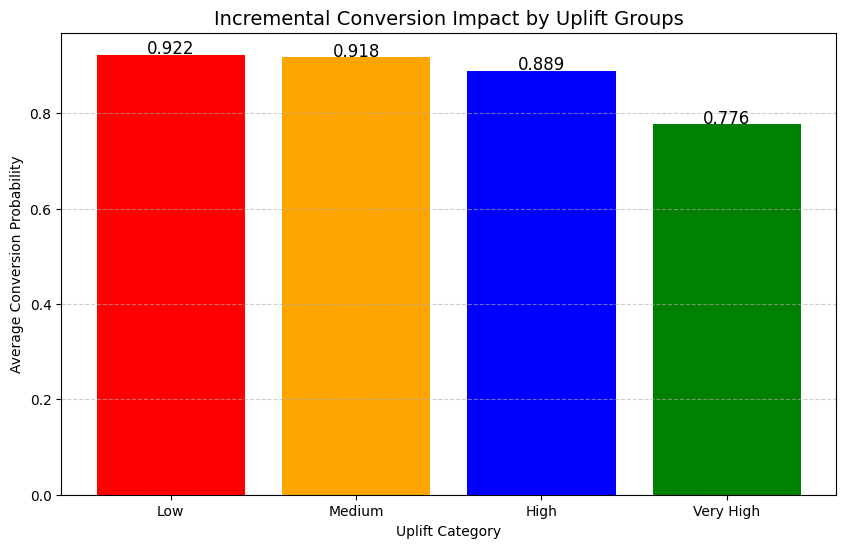

In [20]:
# Group data by uplift level
uplift_summary = df.groupby('UpliftGroup')['Conversion'].agg(
    Avg_Conversion='mean',
    Users='count'
).reset_index()

print("\n🔹 Uplift Effect Summary Table:")
display(uplift_summary)

# Plot uplift impact
plt.figure(figsize=(10,6))
bars = plt.bar(uplift_summary['UpliftGroup'], uplift_summary['Avg_Conversion'],
               color=['red', 'orange', 'blue', 'green'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002,
             f"{yval:.3f}", ha='center', fontsize=12)

plt.title("Incremental Conversion Impact by Uplift Groups", fontsize=14)
plt.xlabel("Uplift Category")
plt.ylabel("Average Conversion Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Treatment Distribution:
Treatment
1    8000
Name: count, dtype: int64

T-Statistic: nan
P-Value: nan

Group Means:
    Treatment  Avg_Conversion
0          1          0.8765


/tmp/ipython-input-1941097053.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_means, x='Treatment', y='Avg_Conversion', palette='viridis')


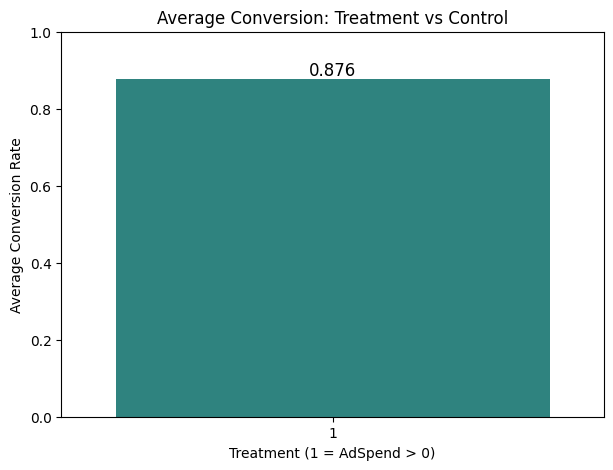

In [28]:
# --- 4.5.1 Treatment Definition & Hypothesis Testing ---

import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Define Treatment Variable
df['Treatment'] = np.where(df['AdSpend'] > 0, 1, 0)

# Check treatment distribution
print("Treatment Distribution:")
print(df['Treatment'].value_counts())

# Hypothesis Testing: Does Treatment increase Conversion?
treatment_group = df[df['Treatment'] == 1]['Conversion']
control_group = df[df['Treatment'] == 0]['Conversion']

t_stat, p_value = ttest_ind(treatment_group, control_group, equal_var=False)

print("\nT-Statistic:", t_stat)
print("P-Value:", p_value)

# Group Means Table
group_means = df.groupby('Treatment')['Conversion'].mean().reset_index()
group_means.columns = ['Treatment', 'Avg_Conversion']
print("\nGroup Means:\n", group_means)

# Visualization
plt.figure(figsize=(7,5))
sns.barplot(data=group_means, x='Treatment', y='Avg_Conversion', palette='viridis')
plt.title("Average Conversion: Treatment vs Control")
plt.xlabel("Treatment (1 = AdSpend > 0)")
plt.ylabel("Average Conversion Rate")

# Add labels on top of bars
for i, v in enumerate(group_means['Avg_Conversion']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=12)

plt.ylim(0, 1)
plt.show()


In [30]:
ITE_summary = df['ITE'].describe()
print("\n📌 Individual Treatment Effect Summary:\n")
print(ITE_summary)



📌 Individual Treatment Effect Summary:

count    8000.000000
mean        0.098228
std         0.062355
min        -0.060895
25%         0.052993
50%         0.087588
75%         0.132847
max         0.398611
Name: ITE, dtype: float64


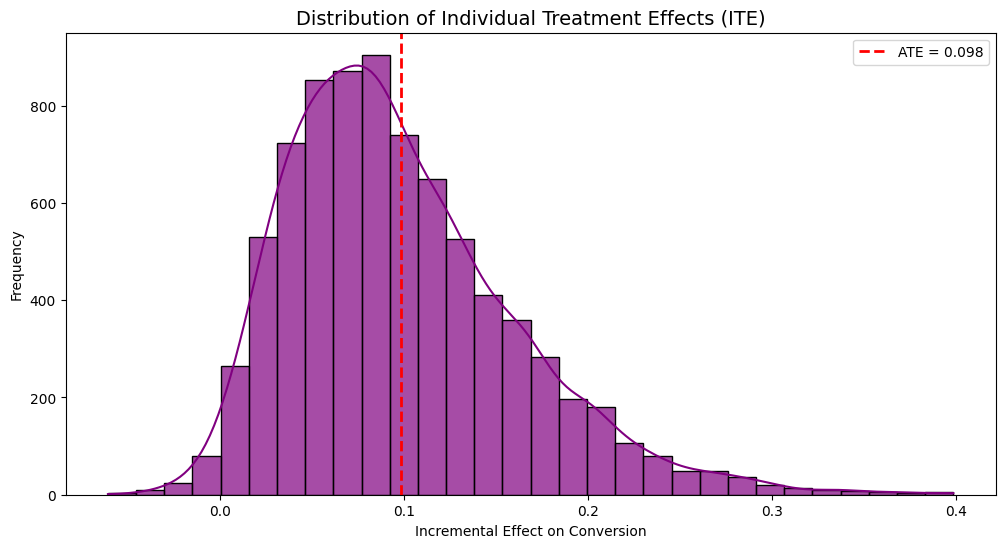

In [33]:
# ==========================================
# 4.5.3 Individual Treatment Effect (ITE) Distribution
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure ATE exists (in case cell was restarted)
ATE = df['ITE'].mean()

plt.figure(figsize=(12,6))
sns.histplot(df['ITE'], bins=30, kde=True, color='purple', alpha=0.7)

# ATE reference line
plt.axvline(ATE, color='red', linestyle='--', linewidth=2,
            label=f"ATE = {ATE:.3f}")

# Labels and title
plt.title("Distribution of Individual Treatment Effects (ITE)", fontsize=14)
plt.xlabel("Incremental Effect on Conversion")
plt.ylabel("Frequency")
plt.legend()
plt.grid(False)
plt.show()


In [32]:
df['UpliftGroup'] = pd.qcut(df['ITE'], 4,
                            labels=['Low', 'Medium', 'High', 'Very High'])

uplift_summary = df.groupby('UpliftGroup')['Conversion'].mean().reset_index()
uplift_summary


/tmp/ipython-input-1404354318.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uplift_summary = df.groupby('UpliftGroup')['Conversion'].mean().reset_index()


,UpliftGroup,Conversion
0,Low,0.9225
1,Medium,0.9180
2,High,0.8890
3,Very High,0.7765
